In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [101]:
plt.style.use('seaborn-pastel')

data-link(kaggle): https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019

In [3]:
%%HTML
<style type = 'text/css'>
table.dataframe td, table.dataframe th{
    border: 1px black solid !important;
    color: black !important;
}

In [4]:
df_with_NOTA = pd.read_csv('LS_2.0.csv')

In [5]:
df_with_NOTA

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [6]:
df_with_NOTA.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

> Cleaning the title of the columns 

In [7]:
df_with_NOTA.columns = ['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS']

> We will be working with two versions of our data:-
    1. The one without 'NOTA' entries.
    2. The one with 'NOTA' entries.
    
`NOTA`: None of the above, where elector does chose any of the standing candidate.

In [16]:
df = df_with_NOTA.dropna(axis=0)

In [17]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


In [13]:
#We should reset index as we have dropped NaN values
df.reset_index(drop=True, inplace=True)

### We will start EDA strightaway with each feature one by one.

#### Gender

TOTAL NO OF MALE CANDIDATES: 1760
TOTAL NO OF FEMALE CANDIDATES: 258


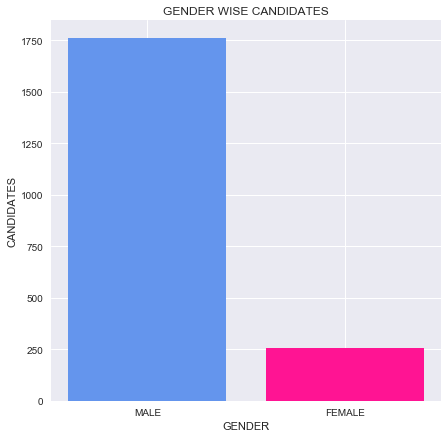

In [105]:
colors = ['cornflowerblue','deeppink']

fig, ax = plt.subplots(figsize=(7,7))

ax.bar(df['GENDER'].unique(), df['GENDER'].value_counts(), color = colors)

ax.set(xlabel = 'GENDER',
       ylabel = 'CANDIDATES',
       title = 'GENDER WISE CANDIDATES');

print('TOTAL NO OF MALE CANDIDATES:',df['GENDER'].value_counts()[0])
print('TOTAL NO OF FEMALE CANDIDATES:',df['GENDER'].value_counts()[1])

#### POLITICAL PARTIES

In [50]:
# Total number of parties 
#df['GENDER'].nunique() 
df['PARTY'].value_counts()[:7]

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
Name: PARTY, dtype: int64

> Top seven parties w.r.t number of candidates.

In [121]:
plt.style.use('fivethirtyeight')

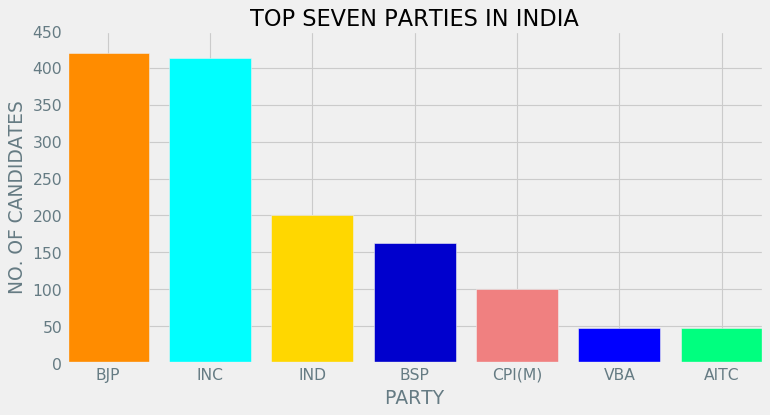

In [122]:
colors = ['darkorange','aqua','gold','mediumblue','lightcoral','blue','springgreen']


fig, ax = plt.subplots(figsize=(10,5))

ax.bar(df['PARTY'].value_counts().index[:7],df['PARTY'].value_counts()[:7], color=colors)

ax.set(xlabel = 'PARTY',
       ylabel = 'NO. OF CANDIDATES',
       title = 'TOP SEVEN PARTIES IN INDIA');


#### CRIMINAL CASES

In [136]:
df[df['CRIMINAL CASES'] == 'Not Available'].index

Int64Index([ 468,  532,  612,  613,  654,  656,  688,  972, 1033, 1052, 1126,
            1309, 1681, 1696, 1716, 1938, 1971, 1978, 2069, 2188, 2223, 2249],
           dtype='int64')

In [148]:
na_index = [ 468,  532,  612,  613,  654,  656,  688,  972, 1033, 1052, 1126,
            1309, 1681, 1696, 1716, 1938, 1971, 1978, 2069, 2188, 2223, 2249]

#for i in na_index:
    #df['CRIMINAL CASES'][i] = None

In [147]:
#df['CRIMINAL CASES'].dropna(axis=0, inplace=True)

In [151]:
#df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int)
# It is giving us a warning `SettingWithCopyWarning` as we are working on copy of original dataframe.

In [206]:
df['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available'], dtype=object)

In [207]:
df_tmp = df.groupby(by='EDUCATION').sum()

In [213]:
plt.style.use('seaborn')

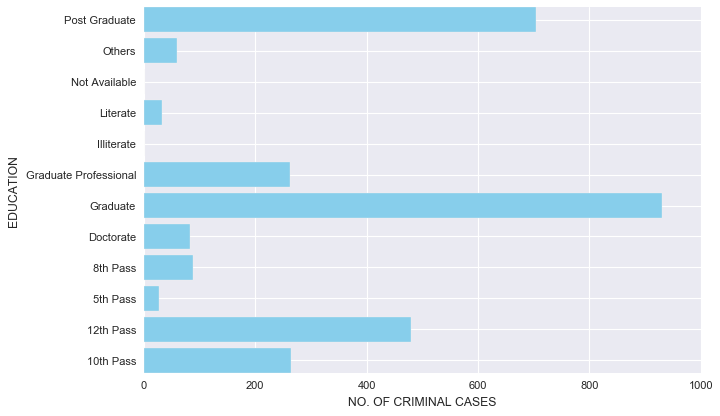

In [218]:
fig, ax = plt.subplots()

ax.barh(df_tmp.index, df_tmp['CRIMINAL CASES'], color='skyblue')

ax.set(xlabel = 'NO. OF CRIMINAL CASES',
       ylabel = 'EDUCATION');

In [219]:
df_tmp

,WINNER,CRIMINAL CASES,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
EDUCATION,,,,,,,,,
10th Pass,45,265.0,10330.0,51558437,214375,51772812,3122.287210,4558.599681,324651691
12th Pass,69,480.0,12807.0,69924422,259554,70183976,4142.400392,6188.182289,428828388
5th Pass,4,28.0,1429.0,4179312,10263,4189575,281.405993,410.996779,45126163
8th Pass,12,88.0,3923.0,14493505,52421,14545926,849.553273,1257.115643,130778515
Doctorate,23,83.0,3963.0,22787263,90382,22877645,1356.035306,2023.592968,122685208
Graduate,132,930.0,23010.0,140928620,527628,141456248,8464.126013,12379.296900,738915879
Graduate Professional,99,263.0,18307.0,107365982,393609,107759591,6518.316909,9574.127962,554363053
Illiterate,1,1.0,274.0,808061,3267,811328,52.703600,77.167301,7463446
Literate,2,33.0,1563.0,3103177,13999,3117176,169.035177,293.701219,53341560


#### EDUCATION V/s WINNING COUNT

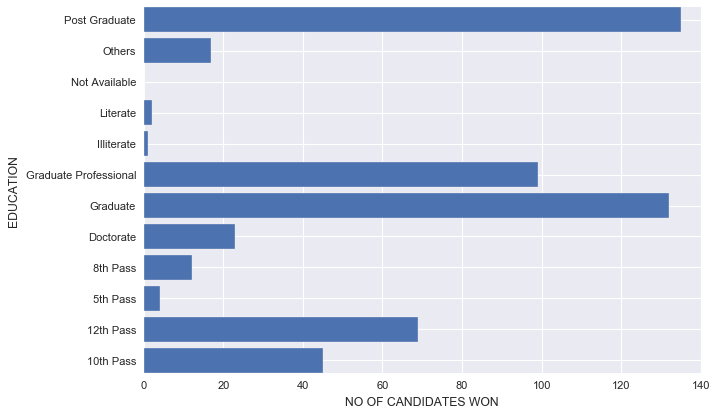

In [224]:
fig, ax = plt.subplots()

ax.barh(df_tmp.index, df_tmp['WINNER'])

ax.set(xlabel = 'NO OF CANDIDATES WON',
       ylabel = 'EDUCATION');

In [239]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [251]:
plt.style.use('seaborn-whitegrid')

In [246]:
df_tmp = df.groupby(by='CATEGORY').sum()

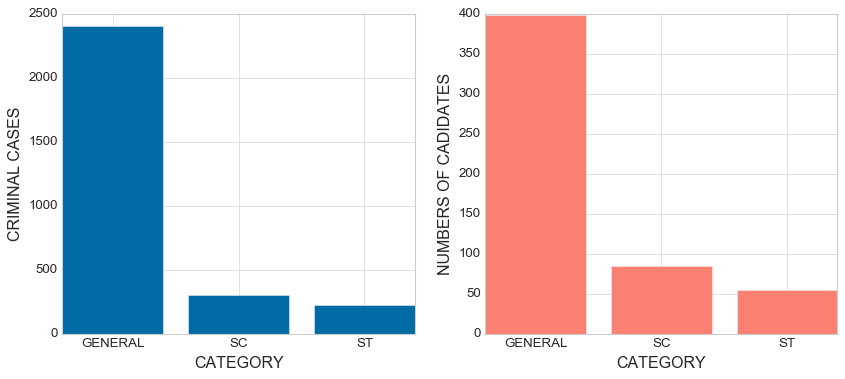

In [276]:
labels = {'General':399,'SC':85,'ST':45}
fig, ax = plt.subplots(1,2,figsize=(12.5,5))

ax[0].bar(df_tmp.index, df_tmp['CRIMINAL CASES'])
ax[1].bar(df_tmp.index, df_tmp['WINNER'], color='salmon')

ax[0].set(xlabel = 'CATEGORY',
          ylabel = 'CRIMINAL CASES')

ax[1].set(xlabel = 'CATEGORY',
          ylabel = 'NUMBERS OF CADIDATES');

In [357]:
ser = df['ASSETS'].str.replace('[Rs,\nLacsCrore+ThuHundNilNtAvilbl` ]','').str.split('~')

In [358]:
lst = []
for i in ser:
    lst.append(i)

In [359]:
for i in range(len(lst)):
    lst[i] = (lst[i][0])

In [360]:
len(ser)

1993

In [361]:
len(lst)

1993

In [364]:
#df['ASSETS'] = lst

In [365]:
df[df['ASSETS'] == ''].index

Int64Index([1523], dtype='int64')

In [368]:
#df.drop(index=[1523], inplace=True)

In [371]:
#df['ASSETS'] = df['ASSETS'].astype(float)

* We dropped few entries in order to convert `ASSETS` feature into numerical

* We will perform similar operations on `LIABILITIES` column

In [373]:
ser = df['LIABILITIES'].str.replace('[Rs,\nILacs+CroreThuHundNtAvilbl ]','').str.split('~')

In [374]:
lst = []
for i in ser:
    lst.append(i)

In [375]:
#lst

In [376]:
for i in range(len(lst)):
    lst[i] = (lst[i][0])

In [352]:
#lst

In [378]:
#df['LIABILITIES'] = lst

In [379]:
df[df['LIABILITIES'] == '']

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
186,Assam,AUTONOMOUS DISTRICT,JONES INGTI KATHAR,0,IND,Battery Torch,MALE,0.0,68.0,ST,Post Graduate,610218.0,,39425,158,39583,4.973082,6.406488,795945


In [381]:
#df.drop(index=186, inplace=True)

In [386]:
#df['LIABILITIES'] = df['LIABILITIES'].astype(float)

> As now both `ASSETS` & `LIABILITIES` are in numeric form we can perform analysis on it.

In [437]:
plt.style.use('seaborn-whitegrid')

In [422]:
df_tmp = df.groupby(by='WINNER').mean()

In [428]:
df_tmp['LIABILITIES'] = df_tmp['LIABILITIES']/1000

In [426]:
df_tmp['ASSETS'] = df_tmp['ASSETS']/1000

In [429]:
df_tmp

,CRIMINAL CASES,AGE,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
WINNER,,,,,,,,,,
0,1.311295,51.583333,105243.500209,14062.074909,183187.931129,607.331267,183795.262397,11.144879,16.268211,1.654582e+06
1,1.909091,54.441558,209424.415844,35953.624200,592460.847866,2481.823748,594942.671614,35.582162,52.391168,1.679446e+06


Text(0.5, 1.0, 'Mean Assets/Liabilities V/s Result')

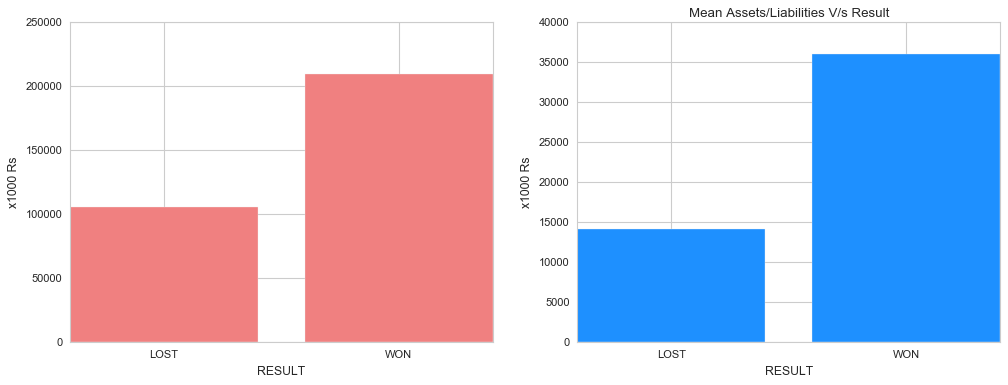

In [442]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(['LOST', 'WON'], df_tmp['ASSETS'], color='lightcoral')

ax[1].bar(['LOST', 'WON'], df_tmp['LIABILITIES'], color='dodgerblue')

ax[0].set(xlabel = 'RESULT',
          ylabel = 'x1000 Rs')

ax[1].set(xlabel = 'RESULT',
          ylabel = 'x1000 Rs');

plt.title('Mean Assets/Liabilities V/s Result')